# Cross Validation
Mỗi tập training set sẽ trả 1 kết quả khác nhau do vậy việc model có tốt hay không phụ thuộc rất lớn tới tập train. Để phần nào đó giải quyết vấn đề này ta có thể sử dụng phương pháp Cross Validation 

- Chia dữ liệu gốc hoặc train ra thành các K-fold
- Sử dụng các tập dữ liệu này training trên các model --> lấy kết quả là giá trị trung bình mà model đó đem lại
- So sánh các giá trị này --> Lựa chọn model có kết quả tốt nhất

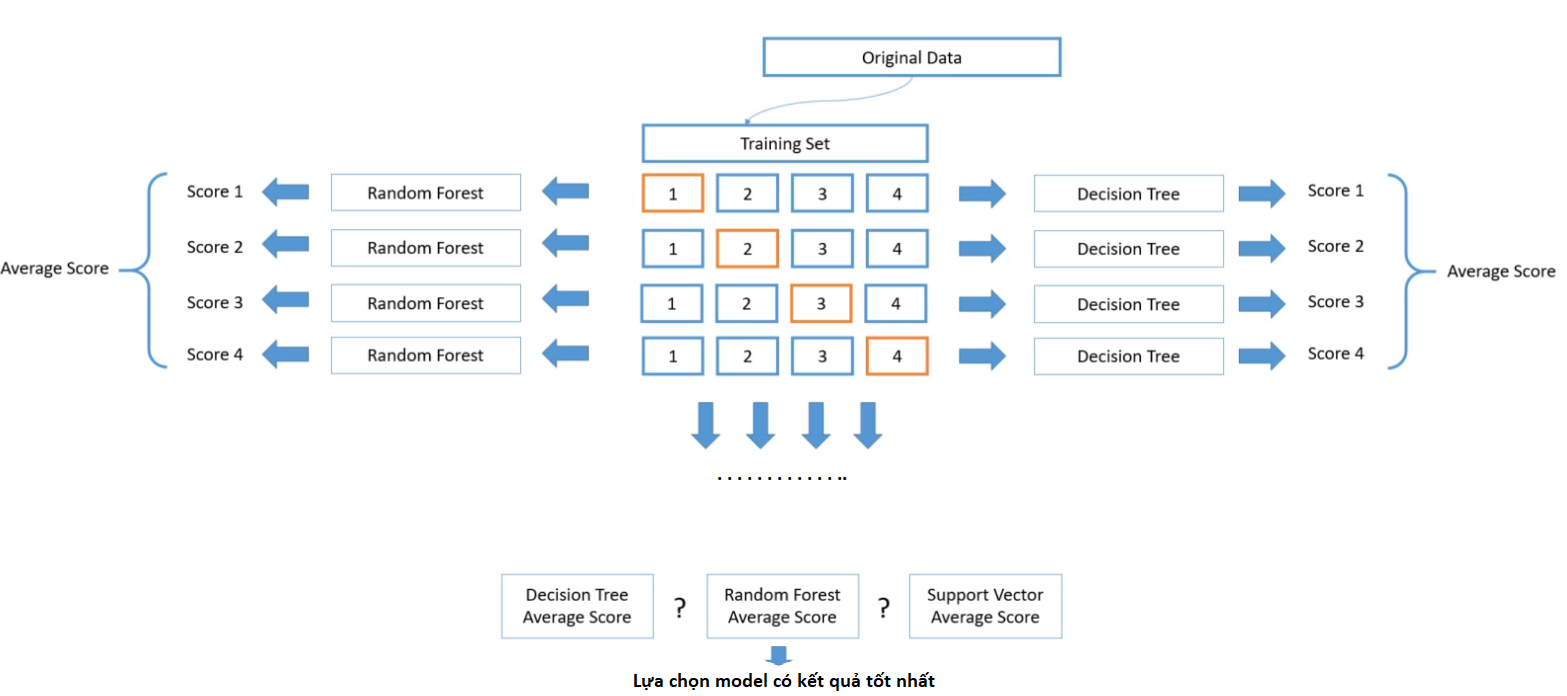

In [2]:
import pandas as pd
data = pd.read_csv('04+-+decisiontreeAdultIncome.csv')
data = pd.get_dummies(data,drop_first=True)
data.head()

,age,hours per week,wc_ Local-gov,wc_ Never-worked,wc_ Private,education_ Doctorate,education_ HS-grad,education_ Masters,education_ Preschool,education_ Prof-school,education_ Some-college,marital status_ Never-married,marital status_ Widowed,marital status_Married,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,gender_ Male,IncomeClass_ >50K
0,38,40,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0
1,28,40,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,37,40,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0
3,31,50,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,1
4,42,40,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,1,1


In [3]:
X = data.iloc[:,:-1]
Y = data.iloc[:,-1]

from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(random_state=1234)

from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(random_state=1234)

from sklearn.svm import SVC
svc = SVC(kernel='rbf', gamma = 0.5)

In [5]:
from sklearn.model_selection import cross_validate
dtc_result = cross_validate(dtc,X,Y,cv=10,return_train_score=True) #DecisionTreeClassifier
rfc_result = cross_validate(rfc,X,Y,cv=10,return_train_score=True) #RandomForestClassifier
svc_result = cross_validate(svc,X,Y,cv=10,return_train_score=True) #SVC

In [6]:
dtc_result

{'fit_time': array([0.10099912, 0.09300017, 0.14799595, 0.12200046, 0.16600084,
        0.31200624, 0.26000237, 0.08500576, 0.06300116, 0.05698299]),
 'score_time': array([0.00799847, 0.00700068, 0.01000047, 0.01399374, 0.06100893,
        0.0300045 , 0.01200557, 0.00698996, 0.0059998 , 0.00399899]),
 'test_score': array([0.77261243, 0.77059121, 0.78170793, 0.75593734, 0.78878221,
        0.79535119, 0.78676099, 0.79271992, 0.77704752, 0.78918099]),
 'train_score': array([0.90408805, 0.90571653, 0.90380728, 0.90571653, 0.90358266,
        0.90380728, 0.90380728, 0.90414959, 0.90532877, 0.90353192])}

In [9]:
import numpy as np
dtc_result_avg = np.average(dtc_result['test_score'])
print(dtc_result_avg)
rfc_result_avg = np.average(rfc_result['test_score']) 
print(rfc_result_avg)
svc_result_avg = np.average(svc_result['test_score'])
print(svc_result_avg)

0.7810691737459707
0.7971904185045097
0.8036085674097743


In [10]:
import numpy as np
dtc_result_avg = np.average(dtc_result['train_score'])
print(dtc_result_avg)
rfc_result_avg = np.average(rfc_result['train_score']) 
print(rfc_result_avg)
svc_result_avg = np.average(svc_result['train_score'])
print(svc_result_avg)

0.9043535882172298
0.9042918191721612
0.8744798848765454


In [ ]:
# Decision tree có high train_score và low Test_score --> Có vẻ bị overfit khi so sánh với 2 model còn lại
# SVC là model tốt nhất khi mà có hight train_score và high test_score khi so sánh
# --> Chọn SVC